In [1]:
# 라이브러리 불러오기

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy as sp


# 한글폰트 출력 가능 코드
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

### 데이터 설명: 케글에 있는 Chicago Crime(2001~현재) 데이터에서 2022년에 일어난 데이터

### https://www.kaggle.com/datasets/chicago/chicago-crime

In [2]:
# 파일명 : 범죄데이터

df = pd.read_csv("범죄데이터.csv",index_col=0)
df

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
ID,,,,,,,,,,,,,,,,,,,,,
12836330,JF407076,2022-09-22 23:00,010XX W RANDOLPH ST,810,절도,$500 초과,거리,False,False,1224,...,27.0,28,6,1169327.0,1901202.0,2022,01/03/2023 03:46:28 PM,41.884410,-87.653665,"(41.884410376, -87.653664839)"
12713141,JF259485,2022-05-29 0:00,014XX S MUSEUM CAMPUS DR,870,절도,주머니 훔치기,스포츠 아레나 / 경기장,False,False,132,...,4.0,33,6,NaN,NaN,2022,06/05/2022 04:48:59 PM,NaN,NaN,NaN
12837355,JF408212,2022-09-23 19:45,001XX W HURON ST,486,폭행,가정 폭력 간단한,인도,False,True,1832,...,2.0,8,08B,1175253.0,1905045.0,2022,01/03/2023 03:46:28 PM,41.894825,-87.631789,"(41.894824927, -87.631788635)"
12600669,JF122951,2022-01-24 17:30,018XX W GRAND AVE,910,자동차 절도,자동차,거리,False,False,1221,...,36.0,24,7,1164069.0,1903522.0,2022,07/06/2023 04:46:09 PM,41.890889,-87.672907,"(41.890889291, -87.672907259)"
12770469,JF328862,2022-07-23 16:00,069XX W 64TH PL,486,폭행,가정 폭력 간단한,주택,True,True,812,...,13.0,64,08B,1131307.0,1860969.0,2022,07/06/2023 04:46:09 PM,41.774746,-87.794208,"(41.774745709, -87.794208216)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130030,JG328516,2022-06-17 0:01,004XX S LOTUS AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,아파트,False,False,1522,...,29.0,25,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN
13128041,JG326305,2022-12-01 0:00,049XX W WEST END AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,거리,False,False,1532,...,28.0,25,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN
13128260,JG325445,2022-10-02 16:15,082XX S DREXEL AVE,1153,사기적인 행위,재정적 ID 도용 $300 이상,NaN,False,False,631,...,8.0,44,11,NaN,NaN,2022,07/05/2023 04:48:33 PM,NaN,NaN,NaN


In [3]:
# 파일데이터 확인

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238712 entries, 12836330 to 13129286
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Case Number           238712 non-null  object 
 1   Date                  238712 non-null  object 
 2   Block                 238712 non-null  object 
 3   IUCR                  238712 non-null  object 
 4   Primary Type          238712 non-null  object 
 5   Description           237557 non-null  object 
 6   Location Description  237870 non-null  object 
 7   Arrest                238712 non-null  bool   
 8   Domestic              238712 non-null  bool   
 9   Beat                  238712 non-null  int64  
 10  District              238712 non-null  int64  
 11  Ward                  238702 non-null  float64
 12  Community Area        238712 non-null  int64  
 13  FBI Code              238712 non-null  object 
 14  X Coordinate          233083 non-null  floa

### 1. 컬럼 설명

1. 'ID': 범죄 사건을 고유하게 식별하는 식별자(ID)입니다. 각각의 범죄 사건은 고유한 ID를 가지고 있습니다.

2. 'Case Number': 해당 사건에 대한 보고서 번호 또는 사건 번호를 나타냅니다. 범죄 사건마다 고유한 케이스 번호가 부여됩니다.

3. 'Date': 범죄가 발생한 날짜와 시간 정보를 나타내는 컬럼입니다. 사건이 발생한 정확한 날짜와 시간이 기록됩니다.

4. 'Block': 범죄 발생 장소의 도로 블록(일반적으로 주소의 일부)을 설명하는 컬럼입니다.

5. 'IUCR': 'Illinois Uniform Crime Reporting'의 약자로, 일리노이 주의 표준 범죄 분류 코드를 나타내는 컬럼입니다. 범죄 유형을 구분하는데 사용됩니다.

6. 'Primary Type': 주요 범죄 유형을 나타내는 컬럼입니다. 각각의 사건에 대해 주요 범죄 유형이 지정됩니다.

7. 'Description': 범죄의 세부적인 설명을 담고 있는 컬럼입니다. 'Primary Type'과 함께 범죄에 대한 자세한 정보를 제공합니다.

8. 'Location Description': 범죄가 발생한 장소를 설명하는 컬럼입니다. 주차장, 가정, 상점 등 특정 장소 유형을 나타낼 수 있습니다.

9. 'Arrest': 범죄가 발생한 후 용의자가 체포되었는지 여부를 나타내는 컬럼입니다. 'True' 또는 'False'로 표시됩니다.

10. 'Domestic': 범죄가 가정 내에서 발생했는지 여부를 나타내는 컬럼입니다. 'True' 또는 'False'로 표시됩니다.

11. 'Beat': 아틀란타 시에서 사용되는 행정적인 지역 구분 단위를 나타내는 컬럼입니다. 범죄 관리와 분석을 위해 사용됩니다.

12. 'District': 경찰 구역을 나타내는 컬럼입니다. 'Beat'와 유사한 목적으로 사용됩니다.

13. 'Ward': 도시에서 특정 지역을 의미하는 행정 구역을 나타내는 컬럼입니다.

14. 'Community Area': 도시 내 특정 지역을 의미하는 행정 구역을 나타내는 컬럼입니다.

15. 'FBI Code': FBI(Federal Bureau of Investigation)에서 사용하는 범죄 분류 코드를 나타내는 컬럼입니다.

16. 'X Coordinate' 및 'Y Coordinate': 범죄가 발생한 위치의 좌표 정보를 나타내는 컬럼들입니다.

17. 'Year': 범죄가 발생한 연도를 나타내는 컬럼입니다.

18. 'Updated On': 데이터가 업데이트된 날짜와 시간 정보를 나타내는 컬럼입니다.

19. 'Latitude'와 'Longitude': 범죄 발생 위치의 위도와 경도 좌표 정보를 나타내는 컬럼들입니다.

20. 'Location': 범죄 발생 위치의 전체적인 좌표 정보를 담고 있는 컬럼입니다. 'Latitude'와 'Longitude'와 같은 정보를 포함합니다.

In [4]:
# 결측치 제거
# dropna 메서드 : DataFramde내의 결측값이 포함된 레이블을 제거하는 메서드
# 아무옵션 없이 dropna()함수를 적용한 후에 요약정보를 확인해보면, 하나라도 결측치(NaN)가 존재하면 해당 row는 삭제해버리는 것


# DataFrame.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

# axis : {0: index / 1: columns} 결측치 제거를 진행 할 레이블
# how : {'any' : 존재하면 제거 / 'all' : 모두 결측치면 제거} 제거할 유형-->포함만 시켜도 제거할지, 전무 NA여야 제거할지 정할 수 있다.
# tresh : 결측값이 아닌 값이 몇 개 미만일 경우에만 적용시키는 인수
# 사례) thresh=10옵션
# 결측치(NaN)가 10개 이상인 열을 모두 삭제해버리라는 옵션
# --> 또한 열에 대해 적용해야 하므로 axis=1옵션을 추가해 주어야한다. 생략하거나 axis=0이라면 한 row에 대해 결측치가 10개 이상이라면 그 row를 drop한다.

# subset : dropna메서드를 수행할 레이블을 지정
#(사례) subset = ['범죄유형']옵션은 데이터프레임의 범죄유형 열에 결측값이 1개라도 있으면 그 행을 drop하라는 옵션
# inplace : 원본을 변경할지의 여부

# dropna=False 옵션(default는 True)을 주면 누락데이터(NaN)의 개수도 함께 카운트해 준다.

df.dropna(inplace=True)

In [ ]:
# 결측치 대체 :fillna()
# 결측값을 제거하지 않고 다른 어떤 값으로 대체해주는 방법

# 평균값(mean)으로 대체하는 경우
# fillna(결측값을 대체할 값)형태로 간단하게 사용


mean_age = df['age'].mean()
df['age'].fillna(mean_age, inplace = True)



In [5]:
# 컬럼명 :  한글 로 변경 
df.columns =  ['사건 번호', '날짜','블록','IUCR','범죄 유형','설명','위치 설명','검거 여부','가정 내 범죄','경찰서 순번','지구','구','지역 번호','FBI 코드','X 좌표','Y 좌표','년도','업데이트 일자','위도','경도','위치']

## 시각화 시작

In [6]:
df.reset_index(inplace=True,drop=True)

In [7]:
df

,사건 번호,날짜,블록,IUCR,범죄 유형,설명,위치 설명,검거 여부,가정 내 범죄,경찰서 순번,...,구,지역 번호,FBI 코드,X 좌표,Y 좌표,년도,업데이트 일자,위도,경도,위치
0,JF407076,2022-09-22 23:00,010XX W RANDOLPH ST,810,절도,$500 초과,거리,False,False,1224,...,27.0,28,6,1169327.0,1901202.0,2022,01/03/2023 03:46:28 PM,41.884410,-87.653665,"(41.884410376, -87.653664839)"
1,JF408212,2022-09-23 19:45,001XX W HURON ST,486,폭행,가정 폭력 간단한,인도,False,True,1832,...,2.0,8,08B,1175253.0,1905045.0,2022,01/03/2023 03:46:28 PM,41.894825,-87.631789,"(41.894824927, -87.631788635)"
2,JF122951,2022-01-24 17:30,018XX W GRAND AVE,910,자동차 절도,자동차,거리,False,False,1221,...,36.0,24,7,1164069.0,1903522.0,2022,07/06/2023 04:46:09 PM,41.890889,-87.672907,"(41.890889291, -87.672907259)"
3,JF328862,2022-07-23 16:00,069XX W 64TH PL,486,폭행,가정 폭력 간단한,주택,True,True,812,...,13.0,64,08B,1131307.0,1860969.0,2022,07/06/2023 04:46:09 PM,41.774746,-87.794208,"(41.774745709, -87.794208216)"
4,JF335627,2022-07-29 3:09,052XX N NAGLE AVE,550,"공격, 폭행",과잉행위 경찰관 - 권총,거리,False,False,1613,...,41.0,10,04A,1132572.0,1934567.0,2022,07/06/2023 04:46:09 PM,41.976687,-87.787856,"(41.976687342, -87.787856137)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231337,JF115197,2022-01-25 7:00,035XX N CLARK ST,110,살인,1도 살인,거리,True,False,1924,...,44.0,6,01A,1168488.0,1923884.0,2022,05/07/2023 04:47:57 PM,41.946669,-87.656088,"(41.946669268, -87.65608802)"
231338,JF257221,2022-05-29 17:41,055XX N PARKSIDE AVE,110,살인,1도 살인,집,True,True,1622,...,45.0,11,01A,1137530.0,1936472.0,2022,05/19/2023 04:48:43 PM,41.981827,-87.769577,"(41.981826743, -87.769577054)"
231339,JF171291,2022-03-11 19:30,019XX W NORTH AVE,910,자동차 절도,자동차,거리,False,False,1434,...,32.0,24,7,1162994.0,1910660.0,2022,01/03/2023 03:46:28 PM,41.910499,-87.676655,"(41.910499138, -87.67665453)"
231340,JF216753,2022-04-23 3:56,047XX S LOOMIS BLVD,041A,폭행,과잉행위 - 권총,거리,False,False,933,...,20.0,61,04B,1167798.0,1873280.0,2022,01/03/2023 03:46:28 PM,41.807823,-87.660083,"(41.807822931, -87.660083294)"


## EDA

In [8]:
df["범죄 유형"].unique()

array(['절도', '폭행', '자동차 절도', '공격, 폭행', '어린이 관련 범죄', '무기 위반', '강도',
       '사기적인 행위', '성폭력 범죄', '성범죄', '침입, 절도', '살인', '무단 침입', '기타 범죄',
       '재산 파손', '마약범죄', '스토킹', '방화', '무기 소지면허 위반', '공공질서 위반', '협박',
       '주류 법규 위반', '매춘', '공무원에 대한 방해', '납치', '기타 마약법 위반', '인신매매', '음란물'],
      dtype=object)

### 범죄 유형 별 빈도수 시각화

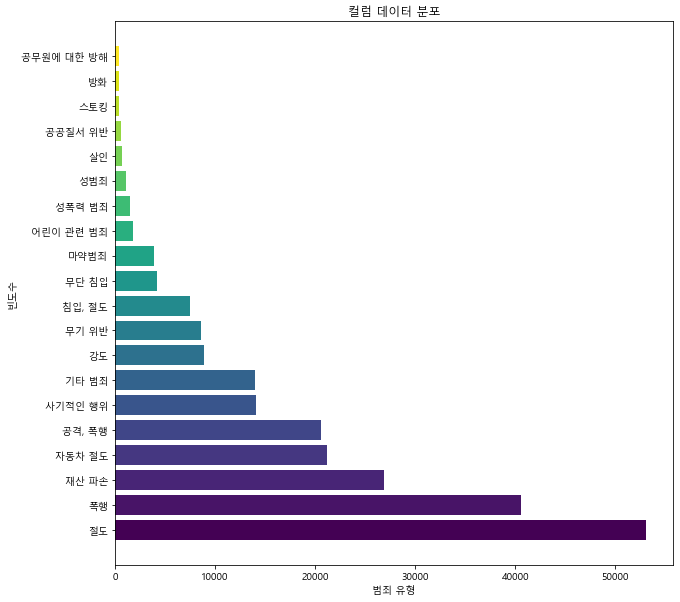

In [9]:

plt.figure(figsize=(10, 10))  # 그래프 크기 지정 (선택사항)
colors = plt.cm.viridis(np.linspace(0, 1, 20))
plt.barh(df["범죄 유형"].value_counts()[:20].index,df["범죄 유형"].value_counts()[:20].values, color=colors )  # 히스토그램으로 시각화 (다른 종류의 그래프도 가능)
plt.xlabel("범죄 유형")  # x축 라벨 지정
plt.ylabel('빈도수')  # y축 라벨 지정
plt.title('컬럼 데이터 분포')  # 그래프 제목 지정 (선택사항)
plt.show()  # 그래프 출력

### 범죄 유형 별 빈도수 시각화

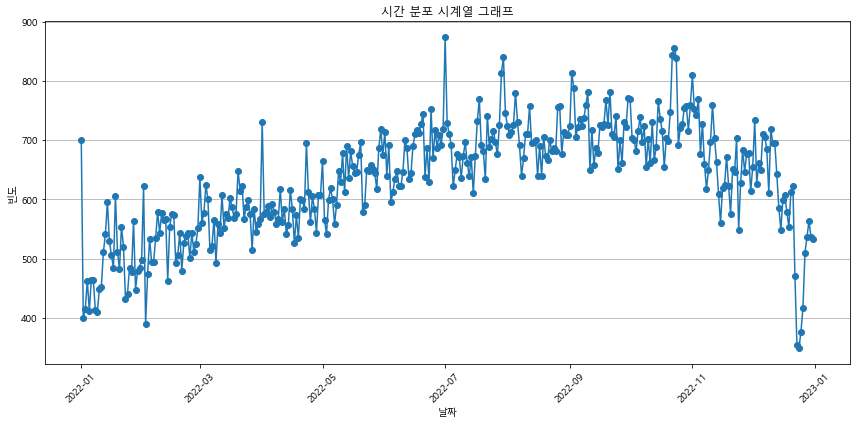

In [10]:
# 데이터프레임 생성

df["날짜"] = pd.to_datetime(df["날짜"])  # 날짜와 시간 형식으로 변환
df['일자'] = df["날짜"].dt.date  # 날짜만 추출

# 범죄 유형 별 빈도수 시각화
date_distribution = df['일자'].value_counts().sort_index()

# 시계열 그래프 시각화
plt.figure(figsize=(12, 6))
date_distribution.plot(marker='o')
plt.xlabel('날짜')
plt.ylabel('빈도')
plt.title('시간 분포 시계열 그래프')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 용의자 체포 여부 시각화

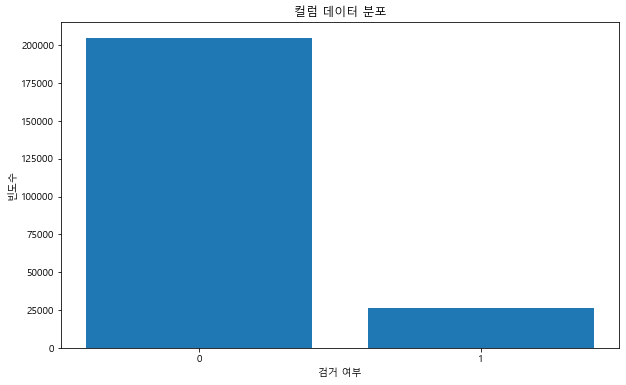

In [11]:
# 용의자 체포 여부 시각화
plt.figure(figsize=(10, 6))  # 그래프 크기 지정 (선택사항)
plt.bar(df["검거 여부"].value_counts().index,df["검거 여부"].value_counts().values )  # 히스토그램으로 시각화 (다른 종류의 그래프도 가능)
plt.xlabel("검거 여부")  # x축 라벨 지정
plt.ylabel('빈도수')  # y축 라벨 지정
plt.xticks([0, 1])
plt.title('컬럼 데이터 분포')  # 그래프 제목 지정 (선택사항)
plt.show()  # 그래프 출력

### 범죄가 가정내 발생여부 확인

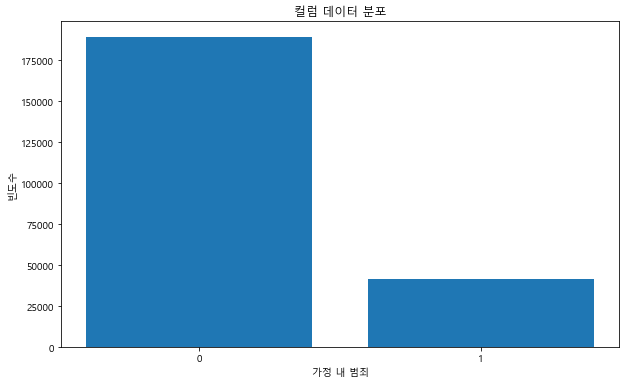

In [12]:
# 범죄가 가정내 발생여부 확인
plt.figure(figsize=(10, 6))  # 그래프 크기 지정 (선택사항)
plt.bar(df["가정 내 범죄"].value_counts().index,df["가정 내 범죄"].value_counts().values )  # 히스토그램으로 시각화 (다른 종류의 그래프도 가능)
plt.xlabel("가정 내 범죄")  # x축 라벨 지정
plt.ylabel('빈도수')  # y축 라벨 지정
plt.xticks([0, 1])
plt.title('컬럼 데이터 분포')  # 그래프 제목 지정 (선택사항)
plt.show()  # 그래프 출력

### 범죄 위치 별 빈도수 시각화

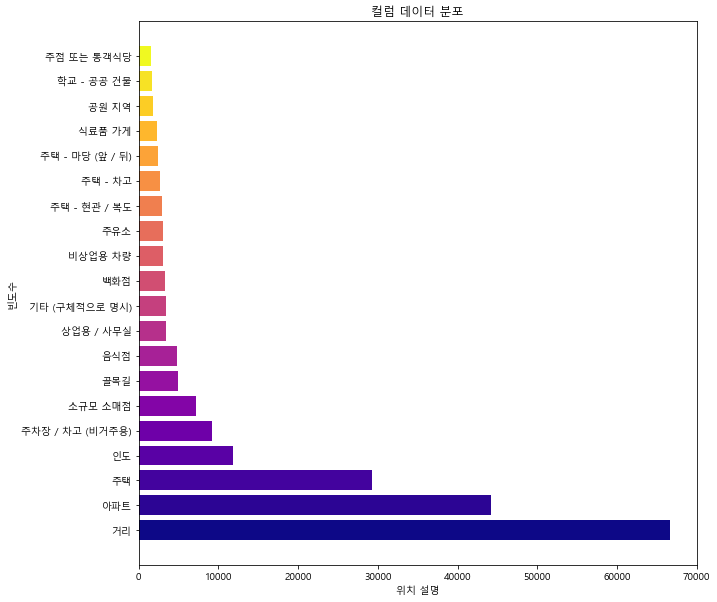

In [13]:
# 범죄 위치 별 빈도수 시각화
plt.figure(figsize=(10, 10))  # 그래프 크기 지정 (선택사항)
colors = plt.cm.plasma(np.linspace(0, 1, 20))
plt.barh(df["위치 설명"].value_counts()[:20].index,df["위치 설명"].value_counts()[:20].values,color=colors )  # 히스토그램으로 시각화 (다른 종류의 그래프도 가능)
plt.xlabel("위치 설명")  # x축 라벨 지정
plt.ylabel('빈도수')  # y축 라벨 지정
plt.title('컬럼 데이터 분포')  # 그래프 제목 지정 (선택사항)
plt.show()  # 그래프 출력

### 사건발생 지도 시각화

In [14]:
import folium

# 지도 생성
map_center = [41.850, -87.650]  # 서울의 위도와 경도
map_osm = folium.Map(location=map_center, zoom_start=13)
locations = []
# 위치 데이터 리스트 (예시)
for i in df.index:

    a =    {'name': i, 'lat': df.loc[i,"위도"] ,'lon': df.loc[i,"경도"]},
    locations.append(a)
    # 추가적인 위치 데이터를 원하는 만큼 리스트에 추가할 수 있습니다.
# 마커 추가
for i in locations[:100]:
    location = i[0]
    marker = folium.Marker(
        location=[location['lat'], location['lon']],
        popup=location['name']
    )
    marker.add_to(map_osm)

# 지도를 HTML 파일로 저장
map_osm.save("map.html")


In [15]:
# 장소 시각화 
map_osm

In [16]:
# 스피어만 상관계수를 비교하기 위한 인코딩 작업
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(df["범죄 유형"])
df["범죄 유형"] = encoder.transform(df["범죄 유형"])

In [17]:
encoder = LabelEncoder()
encoder.fit(df["위치 설명"])
df["위치 설명"] = encoder.transform(df["위치 설명"])

In [18]:
encoder = LabelEncoder()
encoder.fit(df["설명"])
df["설명"] = encoder.transform(df["설명"])

In [19]:
# 상관계수를 확인하기 위한 컬럼 선택
df_cor = df[['범죄 유형', '설명', '위치 설명', '검거 여부', '가정 내 범죄', '위도', '경도']]
df_cor.corr('spearman')

,범죄 유형,설명,위치 설명,검거 여부,가정 내 범죄,위도,경도
범죄 유형,1.000000,-0.425085,0.077860,-0.104412,0.192509,0.039166,0.015110
설명,-0.425085,1.000000,-0.057186,0.038906,-0.185100,-0.023642,0.011546
위치 설명,0.077860,-0.057186,1.000000,-0.060768,0.164983,-0.026821,-0.008439
검거 여부,-0.104412,0.038906,-0.060768,1.000000,0.021972,0.007394,-0.041193
가정 내 범죄,0.192509,-0.185100,0.164983,0.021972,1.000000,-0.117658,0.007095
위도,0.039166,-0.023642,-0.026821,0.007394,-0.117658,1.000000,-0.540810
경도,0.015110,0.011546,-0.008439,-0.041193,0.007095,-0.540810,1.000000


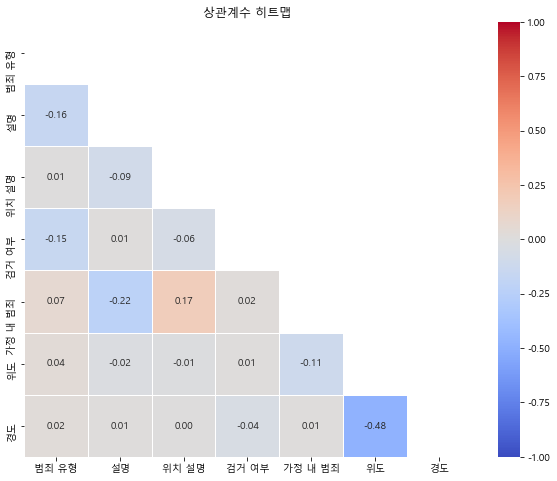

In [20]:
correlation_matrix = df_cor.corr()
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask,annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,vmin=-1, vmax=1)
plt.title('상관계수 히트맵')
plt.show()